In [1]:
#from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, Lambda, Multiply
from keras import backend as K
import cv2, numpy as np
import glob
from keras.activations import relu 
import keras as keras
from keras.models import Model
from keras.layers import  Input,Conv2D,BatchNormalization,Activation,Lambda,Subtract,concatenate,Add,merge,add

from keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose,DepthwiseConv2D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras import backend as K
img_width, img_height = 640, 480
import os
 
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from  sklearn.model_selection import train_test_split

#from tensorflow.python import debug as tf_debug
import imageio
import glob
from skimage import transform as tf

from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.image as plt_img
import scipy
import scipy
import skimage
import re
#import LRFinder
import math as m
import tensorflow as tf 
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler 
from keras import backend as K
from pathlib import Path
 
from keras import optimizers

import numpy as np
 
from keras import backend as K
from skimage.measure import compare_ssim, compare_psnr

import cv2
import numpy as np
from matplotlib import pyplot as plt

tf.random.Generator = None 
import tensorflow_addons as tfa
def psnr(y_true,y_pred):
    return tf.image.psnr(y_true,y_pred,1.0)
def ssim(y_true,y_pred):
    return tf.image.ssim(y_true,y_pred,1.0)
from glob import glob

Using TensorFlow backend.


In [2]:
             
def cnf(z,f):
    return Conv2D(f, kernel_size=3, strides=1,padding='same',activation="relu",kernel_initializer='he_normal')(z)

In [3]:
def plot_sample(lr, sr):
    plt.figure(figsize=(12, 10))

    images = [lr, sr]
    titles = ['denoised', 'noisy']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 2, i+1)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([]) 


In [4]:
def impr(im):
    ar=[]
    img = np.asarray(im) 
    ar.append(img) 
    ay = np.asarray(ar)
    return ay


def rm():
    input_img = Input(shape=(None,None,3))

    y=cnf(input_img,3)
    model = Model(input_img, y)
    return model

In [5]:
a=cv2.imread("t.png") 
a= cv2.cvtColor(a, cv2.COLOR_BGR2RGB)/255
b=impr(a)

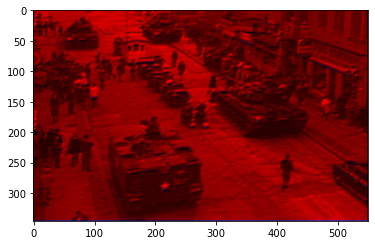

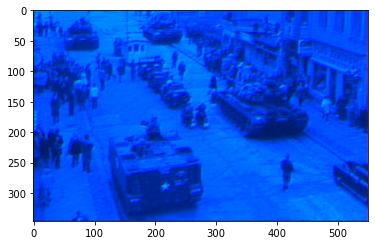

<Figure size 432x288 with 0 Axes>

In [6]:
# data augmentation using random conv filter 

for i in range(2):
    m=rm()
    
    o=m.predict(b)
    x=o[0]
    x=np.clip(x,0,1)
    plt.imshow(x)
    plt.figure()


 


 ### Preparing LR and HR image

In [7]:
ld_im_traget = cv2.resize(a, (256,256),  interpolation=cv2.INTER_CUBIC)
ld_im_in = cv2.resize(ld_im_traget, (128,128),  interpolation=cv2.INTER_CUBIC)

### Custom data augmentation

In [8]:
dat=list()
dat_y=list()
for i in range(128):
    m=rm()
    b=impr(ld_im_in)
    b_y=impr(ld_im_traget)
    o=m.predict(b)
    o_y=m.predict(b_y)
    x=o[0]
    y=o_y[0]
    x=np.clip(x,0,1)
    y=np.clip(y,0,1)
    dat.append(x)
    dat_y.append(y)

In [9]:
x_train=np.asarray(dat)
y_train=np.asarray(dat_y)

In [10]:
input_img = Input(shape=(None,None,3))
l_u= Conv2DTranspose(64, kernel_size=3, strides=2,padding='same',activation="relu",kernel_initializer='he_normal')(input_img)
l_u=Lambda(lambda x: K.sin(x))(l_u)
l_u=Conv2D(64, kernel_size=3, strides=1,padding='same',activation="relu",kernel_initializer='he_normal')(l_u)
u=Conv2D(3, kernel_size=3, strides=1,padding='same',activation="relu",kernel_initializer='he_normal')(l_u)
model = Model(input_img, u)
model.compile(loss='mae', optimizer='adam',    metrics=[psnr,ssim, "accuracy"])

In [11]:
 
  

reduce_lr = ReduceLROnPlateau(monitor = 'val_ssim',
                              factor = 0.4,
                              patience = 6,
                              verbose = 1,
                              min_delta = 0.0001)

filepath="B_zr.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')
 

    
history = model.fit(x_train  , y_train ,validation_split=0.2 , epochs=100, batch_size=2, callbacks = [checkpoint,reduce_lr])

Train on 102 samples, validate on 26 samples
Epoch 1/7000
102/102 [==============================] - 2s 16ms/step - loss: 0.1846 - psnr: 16.5154 - ssim: 0.5223 - accuracy: 0.4826 - val_loss: 0.0997 - val_psnr: 23.8730 - val_ssim: 0.6521 - val_accuracy: 0.7569

Epoch 00001: val_loss improved from inf to 0.09968, saving model to B_zr.hdf5
Epoch 2/7000
102/102 [==============================] - 1s 11ms/step - loss: 0.1654 - psnr: 17.2531 - ssim: 0.5984 - accuracy: 0.5819 - val_loss: 0.0838 - val_psnr: 23.4543 - val_ssim: 0.6531 - val_accuracy: 0.7675

Epoch 00002: val_loss improved from 0.09968 to 0.08380, saving model to B_zr.hdf5
Epoch 3/7000
102/102 [==============================] - 1s 11ms/step - loss: 0.1233 - psnr: 19.4536 - ssim: 0.6079 - accuracy: 0.6520 - val_loss: 0.0659 - val_psnr: 26.7098 - val_ssim: 0.7116 - val_accuracy: 0.7949

Epoch 00003: val_loss improved from 0.08380 to 0.06591, saving model to B_zr.hdf5
Epoch 4/7000
102/102 [==============================] - 1s 11ms/s

102/102 [==============================] - 1s 11ms/step - loss: 0.0190 - psnr: 28.6673 - ssim: 0.8636 - accuracy: 0.9486 - val_loss: 0.0184 - val_psnr: 31.4184 - val_ssim: 0.8587 - val_accuracy: 0.9619

Epoch 00028: val_loss did not improve from 0.01833
Epoch 29/7000
102/102 [==============================] - 1s 12ms/step - loss: 0.0190 - psnr: 28.6673 - ssim: 0.8639 - accuracy: 0.9468 - val_loss: 0.0184 - val_psnr: 31.4262 - val_ssim: 0.8592 - val_accuracy: 0.9615

Epoch 00029: val_loss did not improve from 0.01833

Epoch 00029: ReduceLROnPlateau reducing learning rate to 2.560000284574926e-05.
Epoch 30/7000
102/102 [==============================] - 1s 11ms/step - loss: 0.0190 - psnr: 28.6701 - ssim: 0.8642 - accuracy: 0.9472 - val_loss: 0.0182 - val_psnr: 31.4404 - val_ssim: 0.8596 - val_accuracy: 0.9578

Epoch 00030: val_loss improved from 0.01833 to 0.01823, saving model to B_zr.hdf5
Epoch 31/7000
102/102 [==============================] - 1s 12ms/step - loss: 0.0189 - psnr: 28.68

102/102 [==============================] - 1s 11ms/step - loss: 0.0188 - psnr: 28.7043 - ssim: 0.8653 - accuracy: 0.9459 - val_loss: 0.0181 - val_psnr: 31.4561 - val_ssim: 0.8601 - val_accuracy: 0.9562

Epoch 00055: val_loss improved from 0.01813 to 0.01813, saving model to B_zr.hdf5
Epoch 56/7000
102/102 [==============================] - 1s 12ms/step - loss: 0.0188 - psnr: 28.7044 - ssim: 0.8653 - accuracy: 0.9457 - val_loss: 0.0181 - val_psnr: 31.4561 - val_ssim: 0.8601 - val_accuracy: 0.9563

Epoch 00056: val_loss improved from 0.01813 to 0.01813, saving model to B_zr.hdf5
Epoch 57/7000
102/102 [==============================] - 1s 12ms/step - loss: 0.0188 - psnr: 28.7044 - ssim: 0.8653 - accuracy: 0.9467 - val_loss: 0.0181 - val_psnr: 31.4563 - val_ssim: 0.8601 - val_accuracy: 0.9563

Epoch 00057: val_loss did not improve from 0.01813
Epoch 58/7000
102/102 [==============================] - 1s 11ms/step - loss: 0.0188 - psnr: 28.7045 - ssim: 0.8653 - accuracy: 0.9458 - val_loss: 0

KeyboardInterrupt: 

In [12]:
model.load_weights('B_zr.hdf5')

## Test part

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


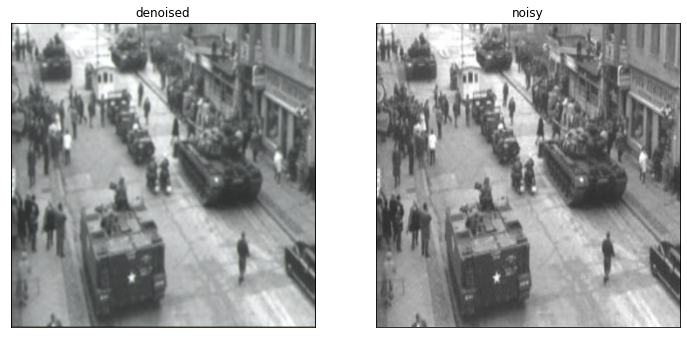

In [13]:
tim=cv2.imread("t.png") 
tim= cv2.cvtColor(tim, cv2.COLOR_BGR2RGB)/255

hd_im_traget = cv2.resize(tim, (512,512),  interpolation=cv2.INTER_CUBIC)
 
ld_im_traget = cv2.resize(hd_im_traget , (256,256),  interpolation=cv2.INTER_CUBIC)
ld_im_in = cv2.resize(ld_im_traget, (128,128),  interpolation=cv2.INTER_CUBIC)


test=impr(ld_im_traget)

pred=model.predict(test)[0]



plot_sample(pred, hd_im_traget)

In [14]:
def tpsnr(y_true, y_pred):
    kl=np.asarray(tf.image.psnr(y_true, y_pred, max_val=1))
    return kl.mean()

def ssim_sk(img1,img2):
    from skimage.metrics import structural_similarity
    ref_image = np.asfarray(img1)
    impaired_image = np.asfarray(img2)
    sr=structural_similarity(ref_image, impaired_image, multichannel=True, gaussian_weights=True, sigma=1.5, use_sample_covariance=False, data_range=1)
    return sr

In [17]:
ssim_sk(hd_im_traget, pred)

0.9456808623604563

In [18]:
tpsnr(hd_im_traget, pred) 

30.186382